# Decision Tree

## Import statements 

In [1]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

## Read the data.

In [3]:
data = np.asarray(pd.read_csv('https://raw.githubusercontent.com/hank199599/Machine-Learning-for-Practical-Optical-Design-data/main/data/data_example_svm%2Bdt.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]

In [4]:

# TODO: Create the decision tree model and assign it to the variable model.
# You won't need to, but if you'd like, play with hyperparameters such
# as max_depth and min_samples_leaf and see what they do to the decision
# boundary.
model = DecisionTreeClassifier()

# TODO: Fit the model.
model.fit(X, y)

# TODO: Make predictions. Store them in the variable y_pred.
y_pred = model.predict(X)

# TODO: Calculate the accuracy and assign it to the variable acc.
acc = accuracy_score(y, y_pred)
print(acc)

1.0


## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


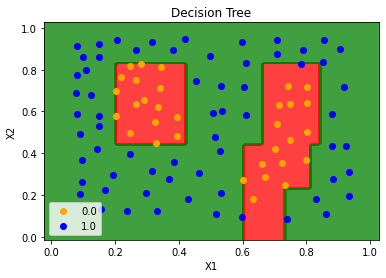

In [5]:

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
X_set, y_set = X, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0.1, stop = X_set[:, 0].max() + 0.1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 0.1, stop = X_set[:, 0].max() + 0.1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Decision Tree')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

# Random Forest

## [pandas.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

## [pandas.DataFrame.fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

In [7]:
# Fitting Random Forest to the Training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0 )
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### 範例：Titanic

#### # Import our libraries

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import display # Allows the use of display() for DataFrames
%matplotlib inline

#### Set a random seed

In [9]:
import random
random.seed(42)

#### Load the dataset
欄位敘述

1. Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
2. Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. Name - Name
4. Sex - Sex
5. Age - Age
6. Sibsp - Number of Siblings/Spouses Aboard
7. Parch - Number of Parents/Children Aboard
8. Ticket - Ticket Number
9. Fare - Passenger Fare
10. Cabin - Cabin
11. Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [10]:

full_data = pd.read_csv('https://raw.githubusercontent.com/hank199599/Machine-Learning-for-Practical-Optical-Design-data/main/data/titanic_data.csv')
# in_file = 'titanic_data.csv'
# full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Store the 'Survived' feature in a new variable and remove it from the dataset

In [ ]:
outcomes = full_data['Survived']
features_raw = full_data.drop('Survived', axis = 1)
display(features_raw.head())

#### Removing the names

In [ ]:
features_no_name = features_raw.drop(['Name'], axis=1)
# features_no_name = features_raw.drop(['Name', 'Ticket', 'Cabin'], axis=1)
display(features_no_name.head())

#### One-hot encoding

In [ ]:
features = pd.get_dummies(features_no_name)
features = features.fillna(0.0)
display(features.head())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, outcomes, test_size=0.2, random_state=42)

#### Import the classifier from sklearn